In [54]:
%load_ext autoreload
%autoreload 3



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import torch
torch.cuda.set_device("cuda:2")

In [56]:
from engine import *
from diffusion import *

from matplotlib import pyplot as plt

In [57]:
import controlled_multi
import dist_controlled_multi

In [64]:
skretch = gen_metropolis(30)

skretch = add_skies(skretch, 4, Z = 200)

skretch = add_ground(skretch, 16, x=0, y= 0,color = (75,75,75))

##skretch = gen_house()


(512, 512, 3)


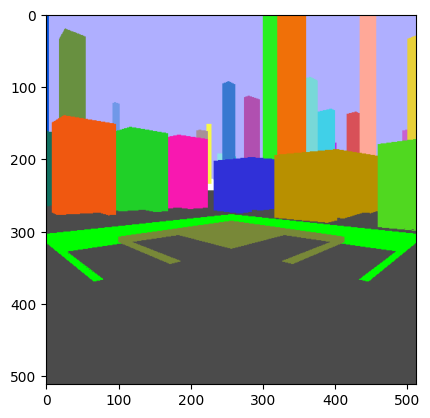

In [65]:
verbose = 0
linewidth = 0
pov = Point(0,0,12)
direction = Point(1,1,-0.1)
vision_angle = 35

sc1 = Scene(skretch, pov, direction, resolution = (512,512), vision_angle = 35, verbose = verbose, linewidth = linewidth)

seg_map = sc1.get_seg_map()
print(seg_map.shape)

plt.imshow(seg_map)

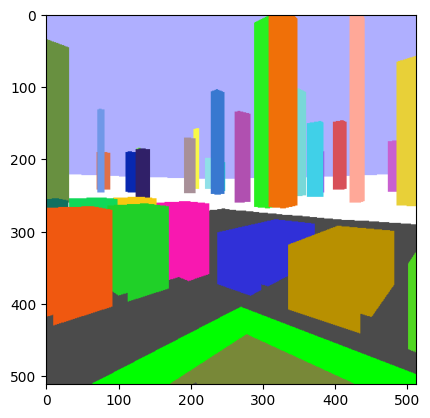

In [66]:
pov = Point(0,10,40)
direction = Point(1,0.9,-0.1)
sc2 = Scene(skretch, pov, direction, resolution = (512,512), vision_angle = 35, verbose = verbose, linewidth = linewidth)
##seg_map = sc2.get_seg_map()
# print(seg_map.shape)
plt.imshow(sc2.get_seg_map())

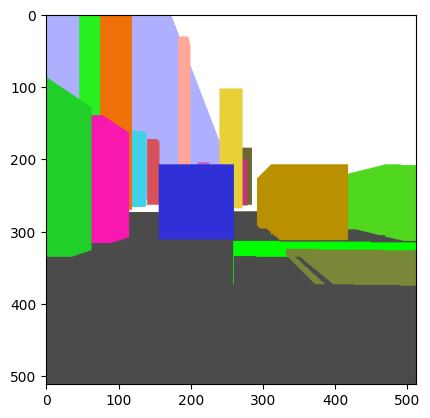

In [67]:
pov = Point(0,60,10)
direction = Point(10,0.1,0.1)
sc3 = Scene(skretch, pov, direction, resolution = (512,512), vision_angle = 35, verbose = verbose, linewidth = linewidth)
##seg_map = sc2.get_seg_map()
# print(seg_map.shape)
plt.imshow(sc3.get_seg_map())

src,dst = sc1.connect(sc2, verbose = False, interpolate_k = 0)

target = np.zeros_like(seg_map)

target[dst[0],dst[1]] = seg_map[src[0],src[1]]
plt.imshow(seg_map)
plt.show()
plt.imshow(target)
plt.show()
seg_map2 = sc2.get_seg_map()
plt.imshow(seg_map2)


In [14]:
from diffusers import StableDiffusionXLControlNetPipeline


In [18]:
##prompt = "a farm"

device = "cuda"
model = "realistic"
model = "xl"
control = ['seg','normal']
control = ['seg']

In [30]:
device = "cuda:2"
pipe1 = controlled_multi.MultiDiffusion(device, control, sc2, sc1, model=model , hf_key=None, interpolate_k = 2)

[INFO] loading stable diffusion...


Keyword arguments {'safety_checker': None} are not expected by StableDiffusionXLControlNetPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

[INFO] pairing scenes
[INFO] loaded stable diffusion!


device = "cuda:3"
pipe2 = controlled_multi.MultiDiffusion(device, control, sc1, sc2, model=model , hf_key=None, interpolate_k = 2)
src_map = pipe.map1
dst_map = pipe.map2

In [31]:
prompt = "a cyberpunk city. Neon lighting, Dark skies. Epic realistic, (hdr:1.4), (muted colors:1.4), apocalypse, abandoned, screen space refractions, (intricate details), (intricate details, hyperdetailed:1.4), artstation, vignette"
nprompt = "blurry, foggy"
image1, image2 = pipe1(prompt = prompt, negative_prompt = nprompt, 
                      num_inference_steps = 200, pairing_strength = 0.8, max_pairing_steps = 200, display_every= -1, guidance_scale = 9.0,
                      controlnet_conditioning_scale = [1.0, 0.4])


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:3                                                                                    │
│                                                                                                  │
│   1 prompt = "a cyberpunk city. Neon lighting, Dark skies. Epic realistic, (hdr:1.4), (muted     │
│   2 nprompt = "blurry, foggy"                                                                    │
│ ❱ 3 image1, image2 = pipe1(prompt = prompt, negative_prompt = nprompt,                           │
│   4 │   │   │   │   │     num_inference_steps = 200, pairing_strength = 0.8, max_pairing_ste     │
│   5 │   │   │   │   │     controlnet_conditioning_scale = [1.0, 0.4])                            │
│   6                                                                                              │
│                                                                                                  │
│ /home/yaniv/anaconda3/envs/pytorch/lib/python3.10/site-packages/torch/autograd/grad_mode.py:27   │
│ in decorate_context                                                                              │
│                                                                                                  │
│    24 │   │   @functools.wraps(func)                                                             │
│    25 │   │   def decorate_context(*args, **kwargs):                                             │
│    26 │   │   │   with self.clone():                                                             │
│ ❱  27 │   │   │   │   return func(*args, **kwargs)                                               │
│    28 │   │   return cast(F, decorate_context)                                                   │
│    29 │                                                                                          │
│    30 │   def _wrap_generator(self, func):                                                       │
│                                                                                                  │
│ /home/yaniv/self_consistent_3d_to_2d/controlled_multi.py:392 in __call__                         │
│                                                                                                  │
│   389 │   │   │   ]                                                                              │
│   390 │   │                                                                                      │
│   391 │   │   # 1. Check inputs. Raise error if not correct.                                     │
│ ❱ 392 │   │   self.check_inputs(prompt, self.mconds1, callback_steps, negative_prompt, prompt_   │
│   393 │   │   self.check_inputs(prompt, self.mconds2, callback_steps, negative_prompt, prompt_   │
│   394                                                                                            │
│   395                                                                                            │
│                                                                                                  │
│ /home/yaniv/self_consistent_3d_to_2d/controlled_multi.py:795 in check_inputs                     │
│                                                                                                  │
│   792 │   │   control_guidance_end=1.0,                                                          │
│   793 │   ):                                                                                     │
│   794 │   │   if self.version == "xl":                                                           │
│ ❱ 795 │   │   │   self.pipe.check_inputs( prompt, image, negative_prompt, prompt_embeds, negat   │
│   796 │   │   │   │   │   │   │   │   │   controlnet_conditioning_scale, control_guidance_star   │
│   797 │   │   else:                                                                              │
│   798 │   │   │   self.pipe.check_inputs( prompt, image, ca

src_map, dst_map = dist_controlled_multi.get_mapping(device  ,sc1,sc2, 0, 1, 2)

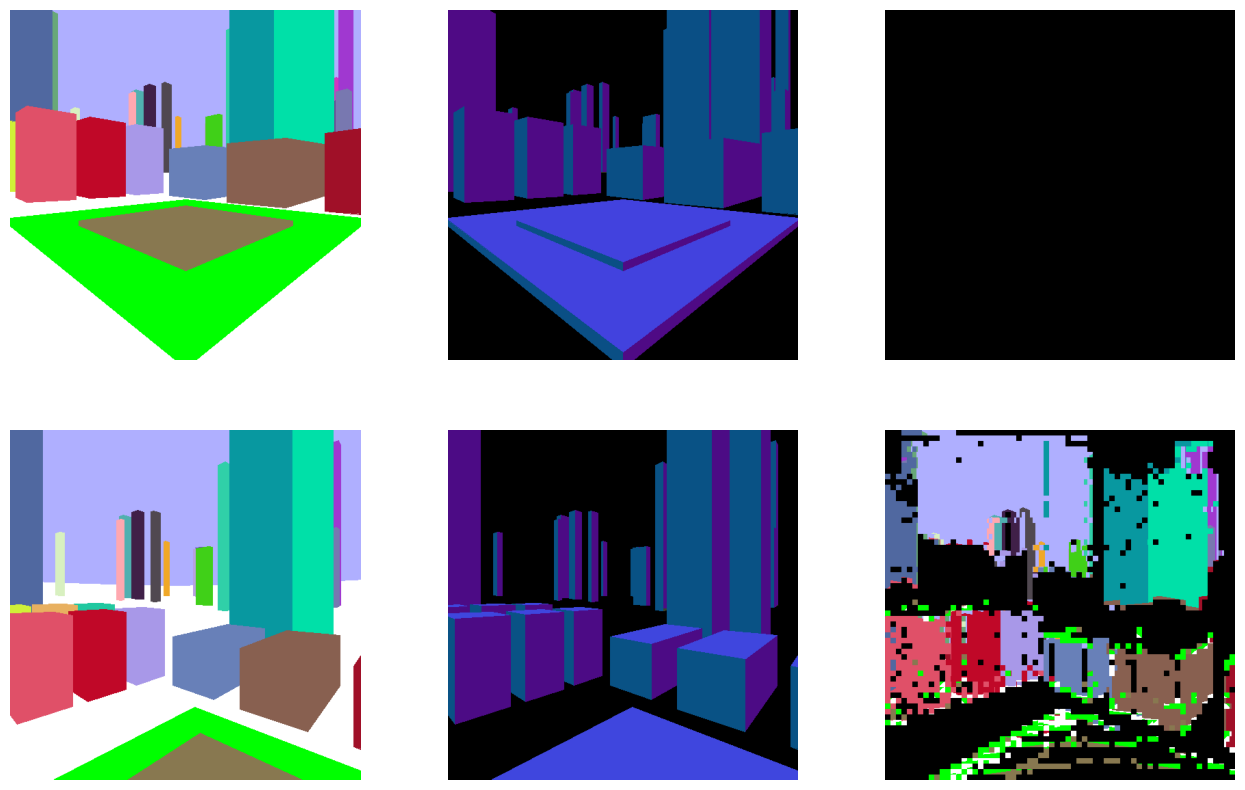

In [13]:

results = [np.zeros_like(sc1.get_seg_map())]

def expand_map(map):
    map1 = map[0].cpu().numpy()*8
    map2 = map[1].cpu().numpy()*8

    ##expand to 8x8 map
    map1 = np.repeat(map1, 64, axis=0)
    map2 = np.repeat(map2, 64, axis=0)

    map1_add = (np.arange(map1.shape[0]) % 8)
    map2_add = ((np.arange(map2.shape[0]) // 8 ) % 8)

    map1 = map1 + map1_add
    map2 = map2 + map2_add
    
    return map1, map2

# tmp = src_map
# src_map = dst_map
# dst_map = tmp


map1, map2 = expand_map(src_map)
dmap1, dmap2 = expand_map(dst_map)



img = sc1.get_seg_map().copy()
mapped_img = np.zeros_like(img)
mapped_img[dmap1, dmap2,:] = img[map1, map2,:]



results.append(mapped_img)
src = [[sc.get_seg_map(),sc.get_norm_map()] for sc in [sc1,sc2]] if 'normal' in control else [[sc.get_seg_map()] for sc in [sc1,sc2]] 

present(src,  results, img_name = f"maps_rank_01")


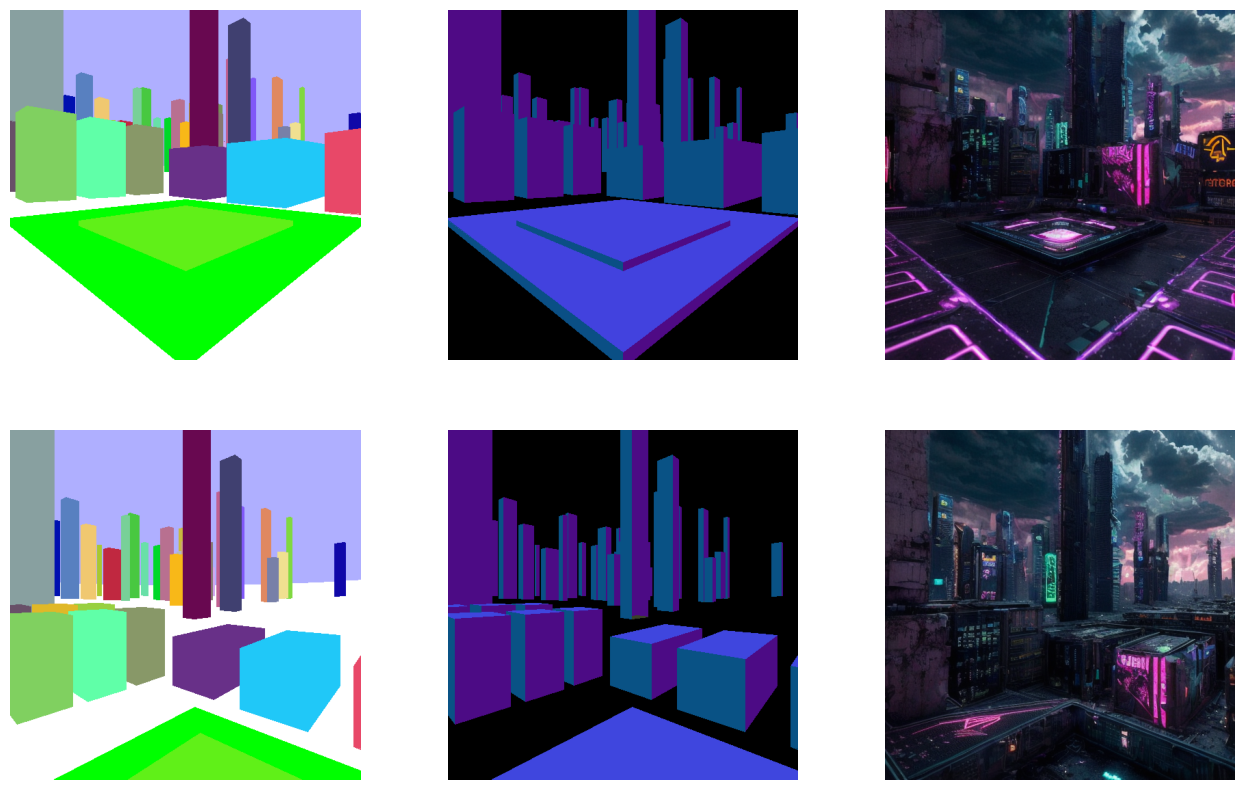

In [10]:
src = [[sc.get_seg_map(),sc.get_norm_map()] for sc in [sc1,sc2]] if 'normal' in control else [[sc.get_seg_map()] for sc in [sc1,sc2]] 



results = [np.asarray(image1), np.asarray(image2)]

present(src, results)

In [88]:
map1, map2 = (np.asarray([[1,3], [2,6], [4,7]]).T)*8

map1 = np.repeat(map1, 64, axis=0)
map2 = np.repeat(map2, 64, axis=0)

map1_add = (np.arange(map1.shape[0]) % 8)
map2_add = (np.arange(map2.shape[0]) // 8)

map1 = map1 + map1_add
map2 = map2 + map2_add

map1

array([ 8,  9, 10, 11, 12, 13, 14, 15,  8,  9, 10, 11, 12, 13, 14, 15,  8,
        9, 10, 11, 12, 13, 14, 15,  8,  9, 10, 11, 12, 13, 14, 15,  8,  9,
       10, 11, 12, 13, 14, 15,  8,  9, 10, 11, 12, 13, 14, 15,  8,  9, 10,
       11, 12, 13, 14, 15,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 16, 17, 18, 19, 20, 21, 22, 23, 16, 17, 18, 19, 20,
       21, 22, 23, 16, 17, 18, 19, 20, 21, 22, 23, 16, 17, 18, 19, 20, 21,
       22, 23, 16, 17, 18, 19, 20, 21, 22, 23, 16, 17, 18, 19, 20, 21, 22,
       23, 16, 17, 18, 19, 20, 21, 22, 23, 32, 33, 34, 35, 36, 37, 38, 39,
       32, 33, 34, 35, 36, 37, 38, 39, 32, 33, 34, 35, 36, 37, 38, 39, 32,
       33, 34, 35, 36, 37, 38, 39, 32, 33, 34, 35, 36, 37, 38, 39, 32, 33,
       34, 35, 36, 37, 38, 39, 32, 33, 34, 35, 36, 37, 38, 39, 32, 33, 34,
       35, 36, 37, 38, 39])

In [83]:
map1, map2 = (np.asarray([[1,3], [2,6], [4,7]]).T)*8

(np.arange(map1.shape[0]) % 8)

3

In [59]:
map1, map2 = np.asarray([[1,3], [2,6]])*8
np.repeat(map1, 64, axis=0)

array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24])

In [46]:
(np.tile(np.arange(64) % 8), (map1.shape[0],1)).T

(8, 8)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,